In [2]:
# Importando bibliotecas para Analise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Lendo a base de dados
basepetr4 = pd.read_excel('data/basepetr4.xlsx')

# Lendo apenas as primeiras linhas das variaveis
print(basepetr4.head())

# Buscando a cotacoes de fechamento apenas da PETR4 e chamando os dados em petr4
petr4 = basepetr4['fechamento']

# Lendo os dados iniciais brutos
print(petr4.head())

                 Date  abertura  maxima  minimo  fechamento    volume
0 2020-01-02 16:56:00     30.51   30.70   30.31       30.70  37774500
1 2020-01-03 00:00:00     30.88   31.24   30.45       30.45  71595600
2 2020-01-07 16:56:00     30.82   30.88   30.47       30.69  32822000
3 2020-01-08 16:56:00     30.69   30.77   30.24       30.50  48215600
4 2020-01-09 16:56:00     30.47   30.62   30.25       30.40  36102700
0    30.70
1    30.45
2    30.69
3    30.50
4    30.40
Name: fechamento, dtype: float64


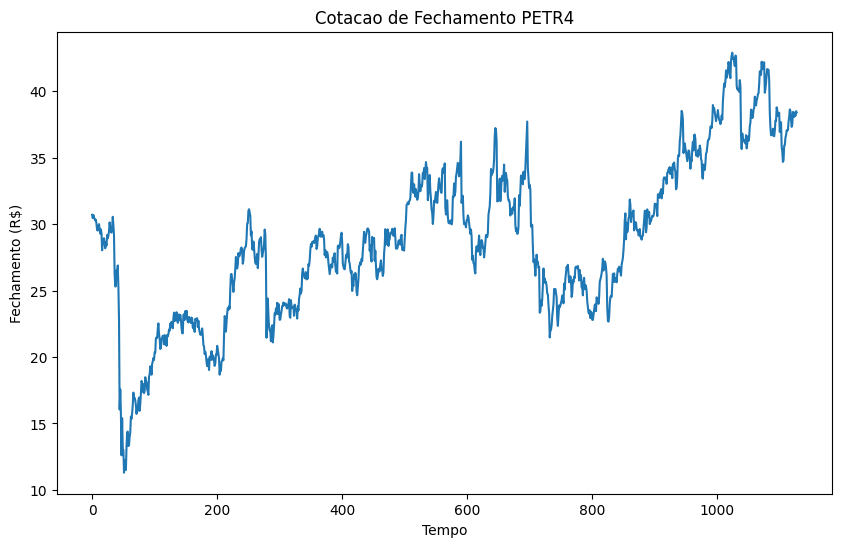

In [4]:
# In[2]: Plotando o grafico bruto (selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(petr4)
plt.title('Cotacao de Fechamento PETR4')
plt.xlabel('Tempo')
plt.ylabel('Fechamento (R$)')
plt.show()

In [5]:
# In[3]: Definindo petr4 como uma serie temporal
petr4_ts = pd.Series(petr4.values, index=pd.to_datetime(basepetr4['Date']))

# Quantas cotacoes tenho?
print(len(petr4_ts))

1128


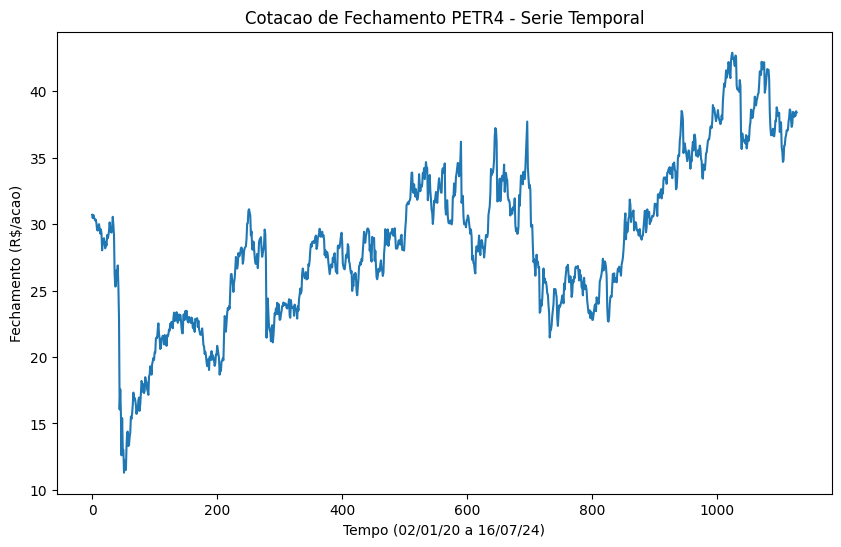

In [6]:
# In[4]: Grafico como serie de tempo usando Plotly (Selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(petr4)
plt.title('Cotacao de Fechamento PETR4 - Serie Temporal')
plt.xlabel('Tempo (02/01/20 a 16/07/24)')
plt.ylabel('Fechamento (R$/acao)')
plt.show()

In [7]:
# In[5]: Considerando as demais informacoes da base de dados basepetr4
volume = basepetr4['volume']
minimo = basepetr4['minimo']
abertura = basepetr4['abertura']

In [8]:
# In[6]: Colocando os dados em forma de uma matriz com todos os dados no conjunto
# chamado dados1
dados1 = pd.concat([petr4, volume, minimo, abertura], axis=1)
dados1.columns = ['Fechamento R$', 'Volume Financ. Neg', 'Mi­nimo R$', 
                  'Abertura R$']

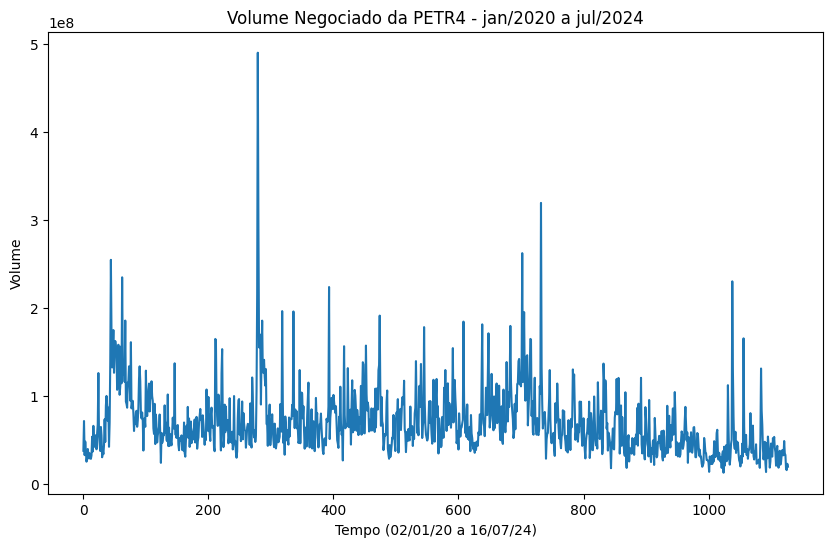

In [9]:
# In[7]: Plotando os graficos (selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(dados1['Volume Financ. Neg'])
plt.title('Volume Negociado da PETR4 - jan/2020 a jul/2024')
plt.xlabel('Tempo (02/01/20 a 16/07/24)')
plt.ylabel('Volume')
plt.show()

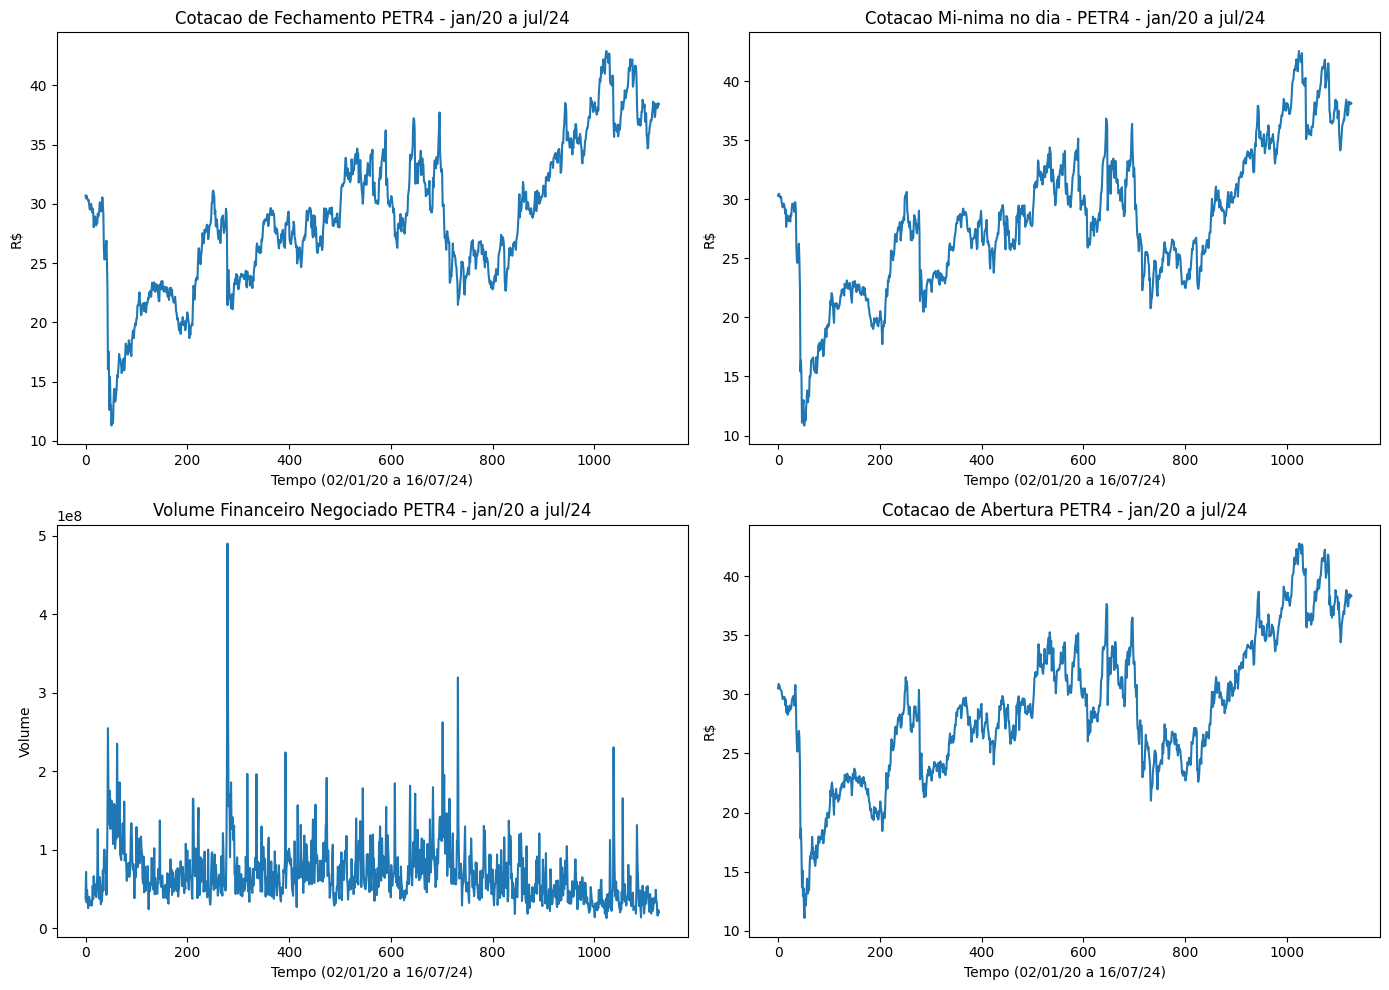

In [10]:
# In[8]: Construindo uma janela com 4 graficos - Selecione todos os comandos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(dados1['Fechamento R$'])
axs[0, 0].set_title('Cotacao de Fechamento PETR4 - jan/20 a jul/24')
axs[0, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 0].set_ylabel('R$')

axs[0, 1].plot(dados1['Mi­nimo R$'])
axs[0, 1].set_title('Cotacao Mi­nima no dia - PETR4 - jan/20 a jul/24')
axs[0, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 1].set_ylabel('R$')

axs[1, 0].plot(dados1['Volume Financ. Neg'])
axs[1, 0].set_title('Volume Financeiro Negociado PETR4 - jan/20 a jul/24')
axs[1, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 0].set_ylabel('Volume')

axs[1, 1].plot(dados1['Abertura R$'])
axs[1, 1].set_title('Cotacao de Abertura PETR4 - jan/20 a jul/24')
axs[1, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 1].set_ylabel('R$')

plt.tight_layout()
plt.show()

In [11]:
# In[9]: Mostrar google planilhas

############## Como forma alternativa, pode-se baixar esses dados diretamente
# do yfinance
##############
# pip install yfinance
import yfinance as yf

# Especifica o ticker do ativo desejado (neste caso, PETR4)
ticker = "PETR4.SA"

# Define o intervalo de datas desejado
start_date = "2022-01-01"
end_date = "2024-07-16"

# Obtemos os dados do Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Exibe os primeiros registros dos dados obtidos
print(data.head())

# Salva os dados em um arquivo CSV
csv_file_path = "data/dados_petroleo.csv"
data.to_csv(csv_file_path)

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-01-03  28.540001  29.219999  28.530001  29.090000  12.382775  52704700
2022-01-04  29.160000  29.400000  28.910000  29.200001  12.429599  51739200
2022-01-05  29.190001  29.270000  27.940001  28.070000  11.948591  78459800
2022-01-06  28.290001  28.650000  27.840000  28.049999  11.940078  61163100
2022-01-07  28.110001  28.290001  27.820000  28.180000  11.995414  47507600


In [12]:
# In[10]: Funcao para baixar dados do Yahoo Finance (Selecionar todos os comandos)
def obter_dados(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [13]:
# In[11]: Funcao para plotar os 4 graficos (Selecionar todos os comandos)
def plotar_graficos(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Grafico 1: Abertura
    axs[0].plot(data['Open'], label='Abertura', color='blue')
    axs[0].set_ylabel('Abertura')

    # Grafico 2: Mi­nima
    axs[1].plot(data['Low'], label='Mi­nima', color='green')
    axs[1].set_ylabel('Minima')

    # Grafico 3: Maxima
    axs[2].plot(data['High'], label='Maxima', color='red')
    axs[2].set_ylabel('Maxima')

    # Grafico 4: Fechamento
    axs[3].plot(data['Close'], label='Fechamento', color='purple')
    axs[3].set_ylabel('Fechamento')

    axs[3].set_xlabel('Data')

    # Adiciona legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()

    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


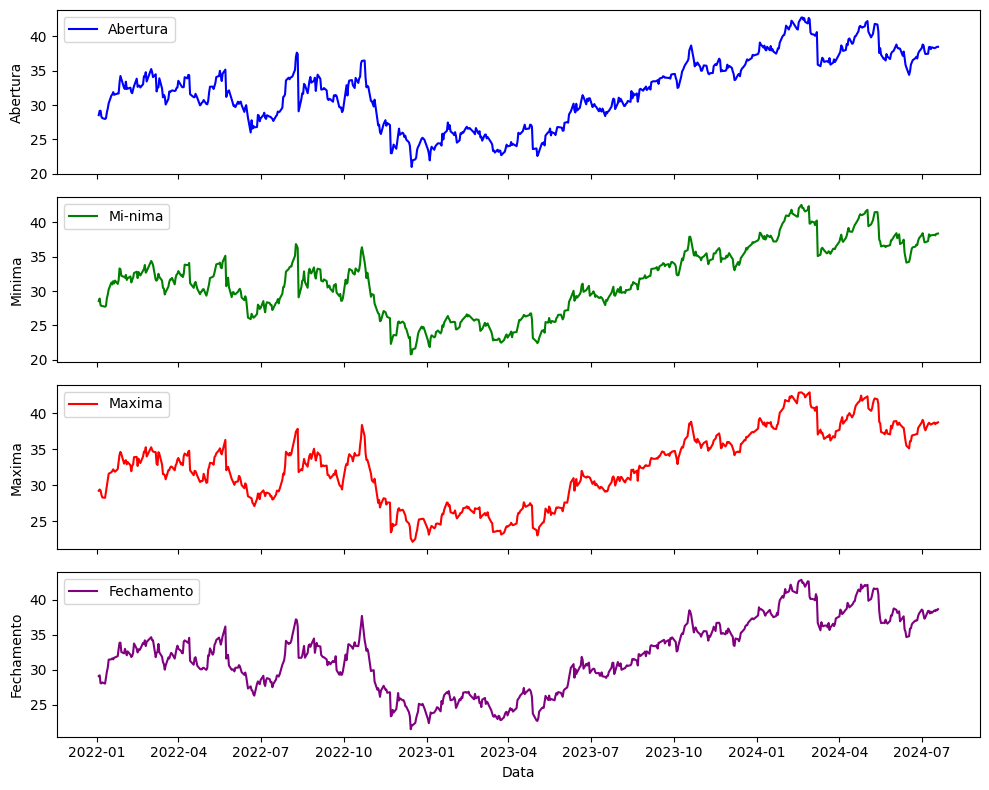

In [14]:
# In[12]: Define o ticker, data de inicio e data de fim
ticker = "PETR4.SA"
start_date = "2022-01-01"
end_date = "2024-07-20"

# In[13]: Obtem os dados do Yahoo Finance
dados = obter_dados(ticker, start_date, end_date)

# In[14]: Plota os 4 graficos
plotar_graficos(dados)

### Trabalhando com a base de dados de Passageiros no Transporte Aereo - BR

In [15]:
# Importando a base de dados
passageiros = pd.read_excel("data/passageiros.xlsx")

# Lendo a base de dados
print(passageiros.head())

# A base de dados tem duas colunas, e os passageiros transportados estao na 
# coluna 2
passag = passageiros.iloc[:, 1]

# Lendo apenas as primeiras linhas das variaveis
print(passag.head())

# Definindo o conjunto de dados passageiros como uma serie temporal
passag_ts = pd.Series(passag.values,
                      index=pd.to_datetime(passageiros.iloc[:, 0]))

        Data  passageiros
0 2011-01-01      8894294
1 2011-02-01      7212406
2 2011-03-01      8326063
3 2011-04-01      8365816
4 2011-05-01      8148295
0    8894294
1    7212406
2    8326063
3    8365816
4    8148295
Name: passageiros, dtype: int64


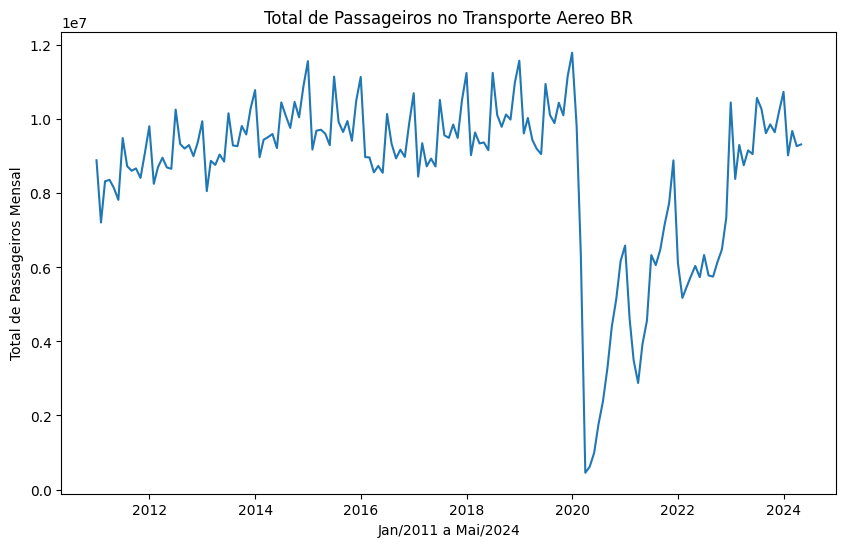

In [16]:
# In[16]: Fazendo o grafico (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(passag_ts)
plt.title("Total de Passageiros no Transporte Aereo BR")
plt.xlabel("Jan/2011 a Mai/2024")
plt.ylabel("Total de Passageiros Mensal")
plt.show()

### Trabalhando com uma Serie Temporal da Receita Trimestral da AMBEV

In [17]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Importando a base de dados
ambev = pd.read_excel("data/ambev.xlsx")

# Lendo a base de dados
print(ambev.head())

       Data   receita_ac  receita_t
0 2000-03-31     877.498    877.498
1 2000-06-30    1690.009    812.511
2 2000-09-30    3522.524   1832.515
3 2000-12-31    5250.345   1727.821
4 2001-03-31    1515.505   1515.505


Ajustando a base de dados trimestrais acumulados da Receita Liquida 

Operacional da AMBEV

Definindo a serie temporal com frequencia trimestral

ATENCAO: dependendo da versao do pandas usar freq='QE'

In [18]:
receita = pd.Series(ambev.iloc[:, 1].values, 
                    index=pd.date_range(start='2000-01-01', periods=len(ambev), 
                                        freq='QE'))

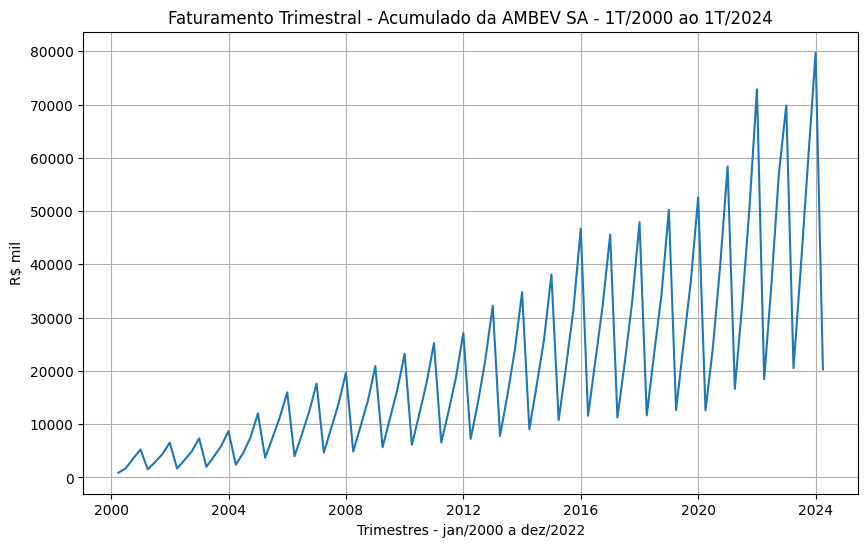

In [19]:
# In[18]: Plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(receita)
plt.title("Faturamento Trimestral - Acumulado da AMBEV SA - 1T/2000 ao 1T/2024")
plt.xlabel("Trimestres - jan/2000 a dez/2022")
plt.ylabel("R$ mil")
plt.grid(True)
plt.show()

#### Trabalhando com a base de dados das Manchas Solares

In [20]:
# Importando a base de dados
manchas = pd.read_excel("data/manchas.xlsx")

# Transformar o data frame em serie de tempo (Selecionar todos os comandos)
sol = pd.Series(manchas['manchas'].values, 
                index=pd.date_range(start='1749-01-01',
                                    periods=len(manchas), freq='M'))

C:\Users\guilh\AppData\Local\Temp\ipykernel_23820\683023581.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='1749-01-01',


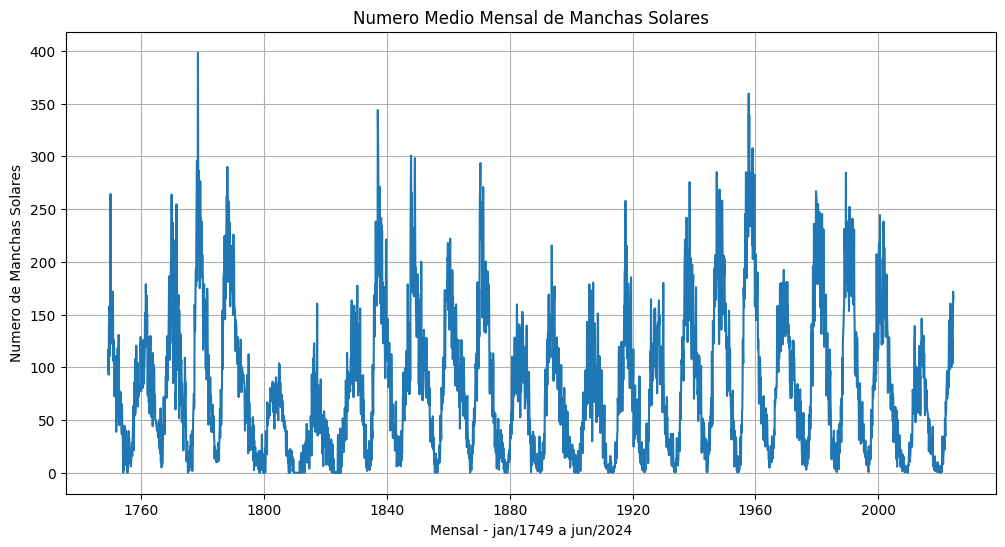

In [21]:
# In[20]: Plotando o grafico (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(sol)
plt.title("Numero Medio Mensal de Manchas Solares")
plt.xlabel("Mensal - jan/1749 a jun/2024")
plt.ylabel("Numero de Manchas Solares")
plt.grid(True)
plt.show()

In [22]:
# In[21]: Medidas das Estatisticas Descritivas da Serie Temporal
print("Resumo estatistico:")
print(sol.describe())
print("\nDesvio padrao:")
print(sol.std())
print("\nNumero de observacoes:")
print(len(sol))

Resumo estatistico:
count    3306.000000
mean       81.875015
std        67.654077
min         0.000000
25%        24.125000
50%        67.900000
75%       122.575000
max       398.200000
dtype: float64

Desvio padrao:
67.65407673388087

Numero de observacoes:
3306


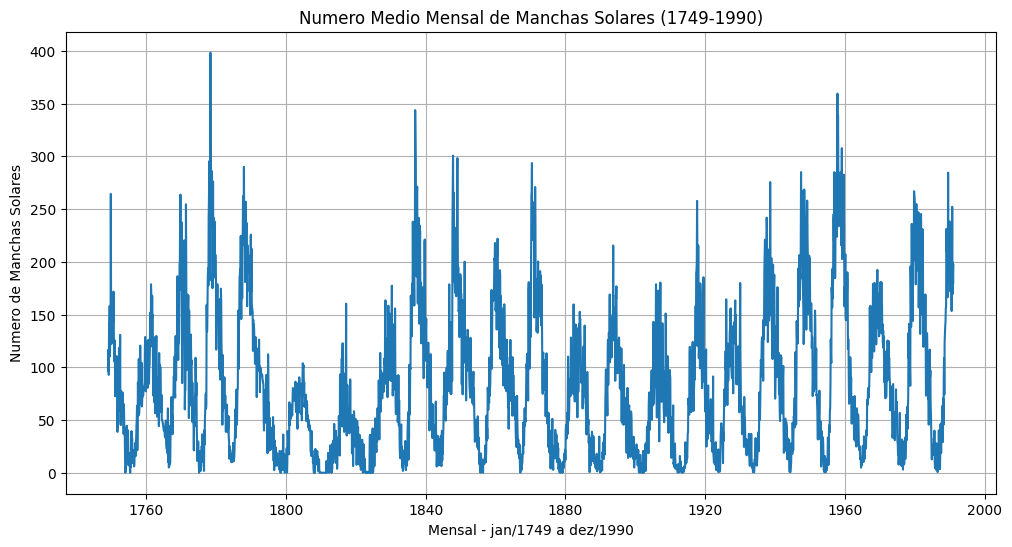

In [23]:
# In[22]: Definir uma janela de tempo da Serie Temporal
sol1 = sol['1749-01-01':'1990-12-31']

# In[23]: Plotando o grafico da janela de tempo (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(sol1)
plt.title("Numero Medio Mensal de Manchas Solares (1749-1990)")
plt.xlabel("Mensal - jan/1749 a dez/1990")
plt.ylabel("Numero de Manchas Solares")
plt.grid(True)
plt.show()

#### Trabalhando com a base de dados de Focos de Queimadas - INPE
#### Fonte: https://terrabrasilis.dpi.inpe.br/queimadas/portal/

In [24]:
# Importando a base de dados
queimadas = pd.read_excel("data/queimadas.xlsx")

# Transformar o data frame em serie de tempo (Selecionar todos os comandos)
queimad = pd.Series(queimadas['focos'].values, 
                index=pd.date_range(start='1999-01-01', 
                                    periods=len(queimadas), freq='M'))

C:\Users\guilh\AppData\Local\Temp\ipykernel_23820\494104943.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='1999-01-01',


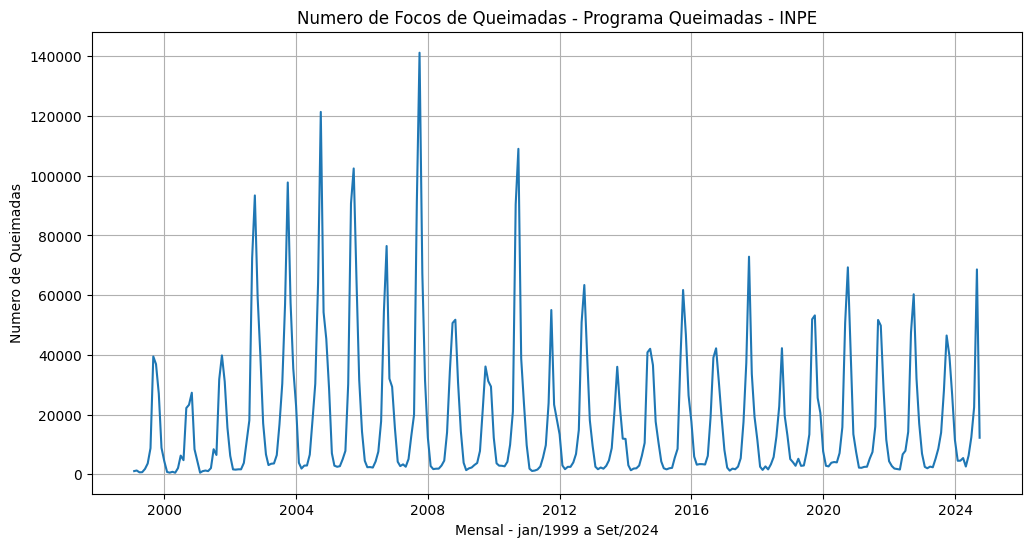

In [25]:
# In[25]: Plotando o grafico (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(queimad)
plt.title("Numero de Focos de Queimadas - Programa Queimadas - INPE")
plt.xlabel("Mensal - jan/1999 a Set/2024")
plt.ylabel("Numero de Queimadas")
plt.grid(True)
plt.show()

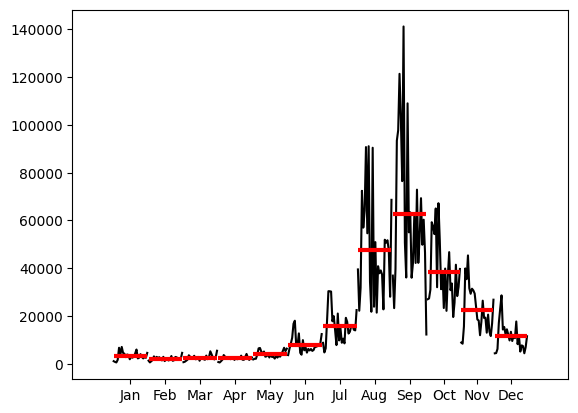

In [26]:
# In[25.1] Grafico das queimadas por mes
import statsmodels.api as sm

sm.graphics.tsa.month_plot(queimad)

plt.show()

#### Trabalhando com uma Serie Temporal de Numeros Aleatorios

In [27]:
# Gerando numeros aleatorios com distribuicao normal padrao
aleat = pd.Series(np.random.normal(size=500))

# Visualizando os dados
print(aleat.head())

0   -0.364618
1   -1.383943
2    0.590005
3   -0.327244
4    0.121185
dtype: float64


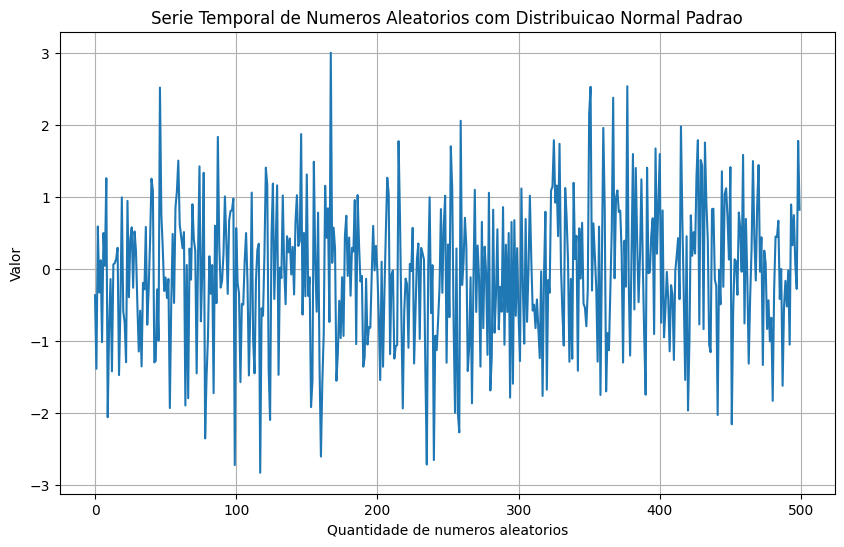

In [28]:
# In[27]: Plotando a serie temporal de numeros aleatorios com distribuicao normal 
# padrao (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(aleat)
plt.title("Serie Temporal de Numeros Aleatorios com Distribuicao Normal Padrao")
plt.xlabel("Quantidade de numeros aleatorios")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

In [29]:
# In[28]: Calculando a media e o desvio padrao
print("Media:", aleat.mean())
print("Desvio padrao:", aleat.std())

Media: -0.07558698761598524
Desvio padrao: 0.9773501363794939


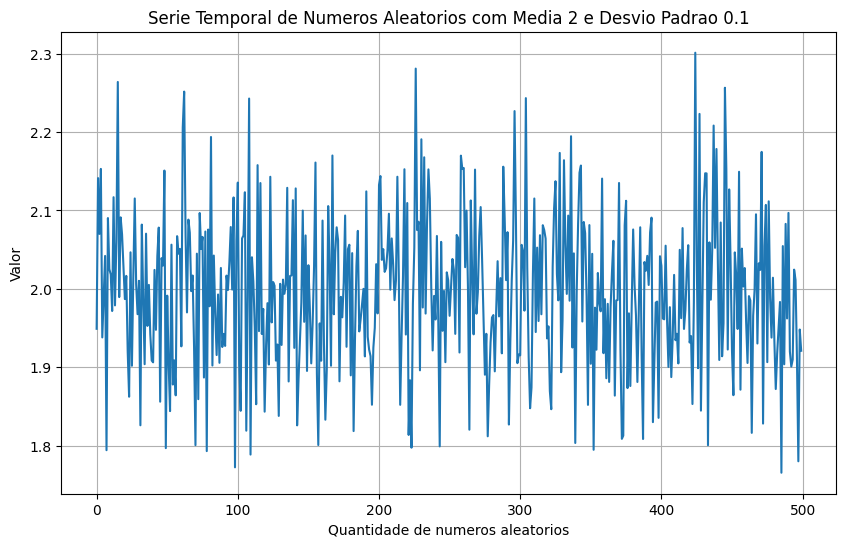

Media: 1.995641263135305
Desvio padrao: 0.09826271421234539


In [30]:
# In[29]: Gerando uma serie de numeros aleatorios com media 2 e desvio padrao 0.1
aleat1 = pd.Series(np.random.normal(loc=2, scale=0.1, size=500))

# In[30]: Plotando a serie temporal de numeros aleatorios com media 2 e 
# desvio padrao 0.1 (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(aleat1)
plt.title("Serie Temporal de Numeros Aleatorios com Media 2 e Desvio Padrao 0.1")
plt.xlabel("Quantidade de numeros aleatorios")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# In[31]: Calculando a media e o desvio padrao
print("Media:", aleat1.mean())
print("Desvio padrao:", aleat1.std())

#### Trabalhando com uma Serie Temporal de um Passeio Aleatorio

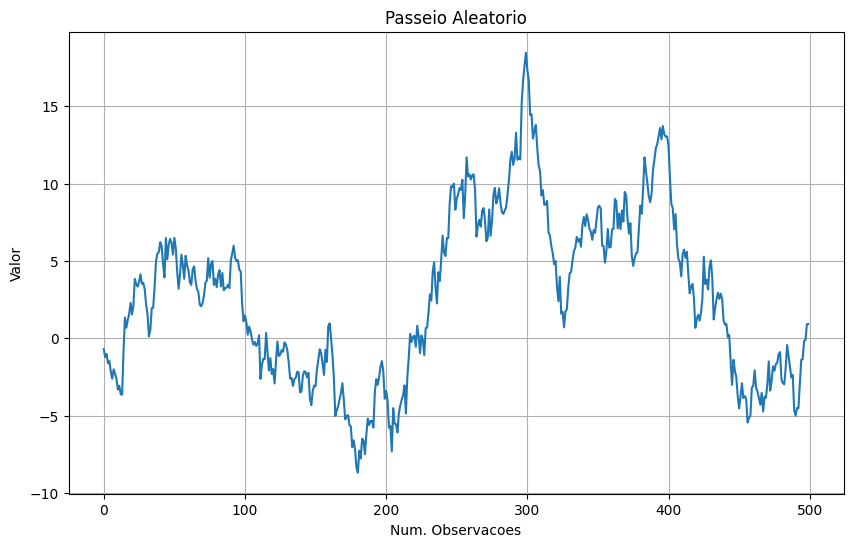

In [31]:
# Gerando numeros aleatorios com distribuicao normal padrao
aleat = pd.Series(np.random.normal(size=500))

# Calculando o passeio aleatorio (soma cumulativa)
passeio = aleat.cumsum()

# In[33]: Plotando o passeio aleatorio (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(passeio)
plt.title("Passeio Aleatorio")
plt.xlabel("Num. Observacoes")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

#### Comparando a Serie PETR4(jan/2020 a jul/2024) com o Passeio Aleatorio

In [32]:
petr4 = basepetr4['fechamento']
print(petr4)

0       30.70
1       30.45
2       30.69
3       30.50
4       30.40
        ...  
1123    38.07
1124    38.33
1125    38.15
1126    38.50
1127    38.40
Name: fechamento, Length: 1128, dtype: float64


In [33]:
# In[35]: Criando a serie petropasseio com o mesmo tamanho da petr4, inicialmente 
# todos os valores com zero
petropasseio = pd.Series(0, index=np.arange(1128))
print(petropasseio)

# Series comecam no mesmo ponto
petropasseio.iloc[0] = petr4.iloc[0]
print(petropasseio)

# Gerando um passeio aleatorio
for i in range(1, 1128):
    petropasseio.iloc[i] = petropasseio[i - 1] + np.random.normal()

print(petropasseio)

0       0
1       0
2       0
3       0
4       0
       ..
1123    0
1124    0
1125    0
1126    0
1127    0
Length: 1128, dtype: int64
0       30.7
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1123     0.0
1124     0.0
1125     0.0
1126     0.0
1127     0.0
Length: 1128, dtype: float64
0       30.700000
1       30.094162
2       29.651911
3       28.570227
4       27.951014
          ...    
1123    12.529603
1124    11.745853
1125     9.773788
1126     9.341063
1127     7.682906
Length: 1128, dtype: float64


C:\Users\guilh\AppData\Local\Temp\ipykernel_23820\3885670492.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  petropasseio.iloc[0] = petr4.iloc[0]


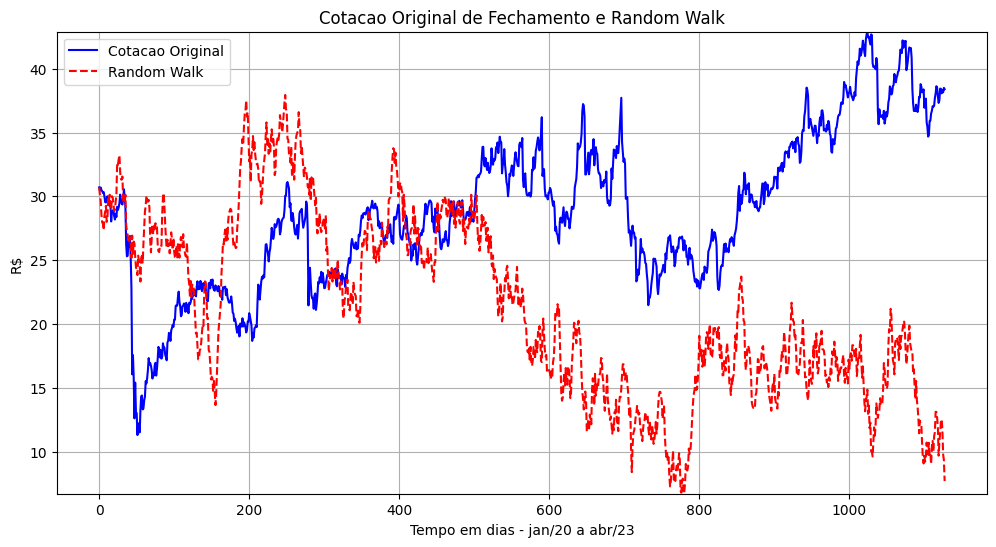

In [34]:
# In[36]: Plotando no mesmo grafico as duas series
plt.figure(figsize=(12, 6))
plt.plot(petr4, label='Cotacao Original', color='blue')
plt.plot(petropasseio, label='Random Walk', linestyle='dashed', color='red')
plt.title("Cotacao Original de Fechamento e Random Walk")
plt.xlabel("Tempo em dias - jan/20 a abr/23")
plt.ylabel("R$")
plt.ylim(min(petropasseio.min(), petr4.min()), max(petropasseio.max(), petr4.max()))
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Tendencia por medias moveis

#####  DECOMPOSICAO DE SERIES TEMPORAIS

##### Lendo a base de dados: Fonte: https://covid.saude.gov.br/

In [35]:
# Analisando a serie de casos diarios de COVID 19 Brasil
# Leitura dos dados
covid = pd.read_excel("data/covid.xlsx")

# In[38]: Transformando a coluna 'Data' em datetime
covid['Data'] = pd.to_datetime(covid['Data'])

# Media movel (14 dias)
covid['media_movel'] = covid['por_dia'].rolling(window=14).mean()

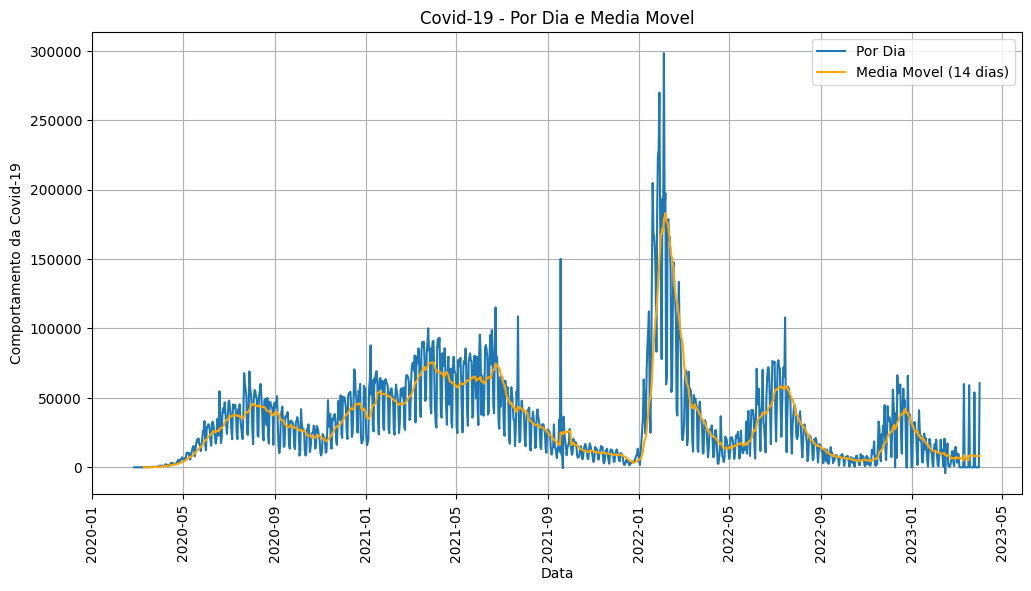

In [36]:
# In[39]: Visualizando a serie com as medias moveis (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(covid['Data'], covid['por_dia'], label='Por Dia')
plt.plot(covid['Data'], covid['media_movel'], label='Media Movel (14 dias)', 
         color='orange')
plt.title('Covid-19 - Por Dia e Media Movel')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

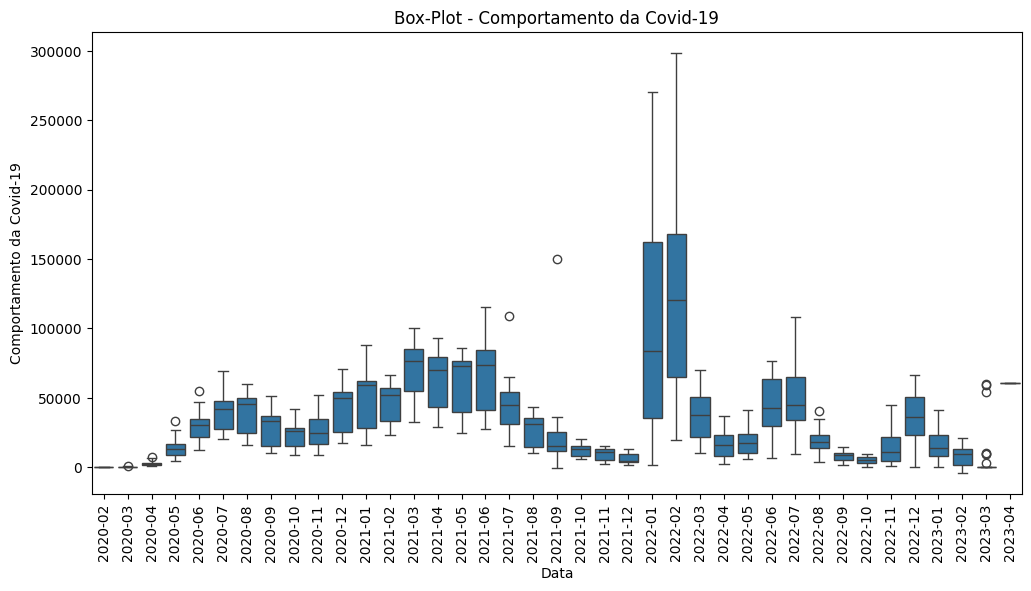

In [37]:
# In[40]: Box-Plot para verificar se temos outliers (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
sns.boxplot(x=covid['Data'].dt.to_period('M'), y=covid['por_dia'])
plt.title('Box-Plot - Comportamento da Covid-19')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.xticks(rotation=90)
plt.show()

In [38]:
# In[41]: Limpeza dos dados com media movel
covid['covid_suave'] = covid['por_dia'].rolling(window=14, center=True).mean()
covid['media_movel_nao_centralizada'] = covid['por_dia'].rolling(window=14).mean()

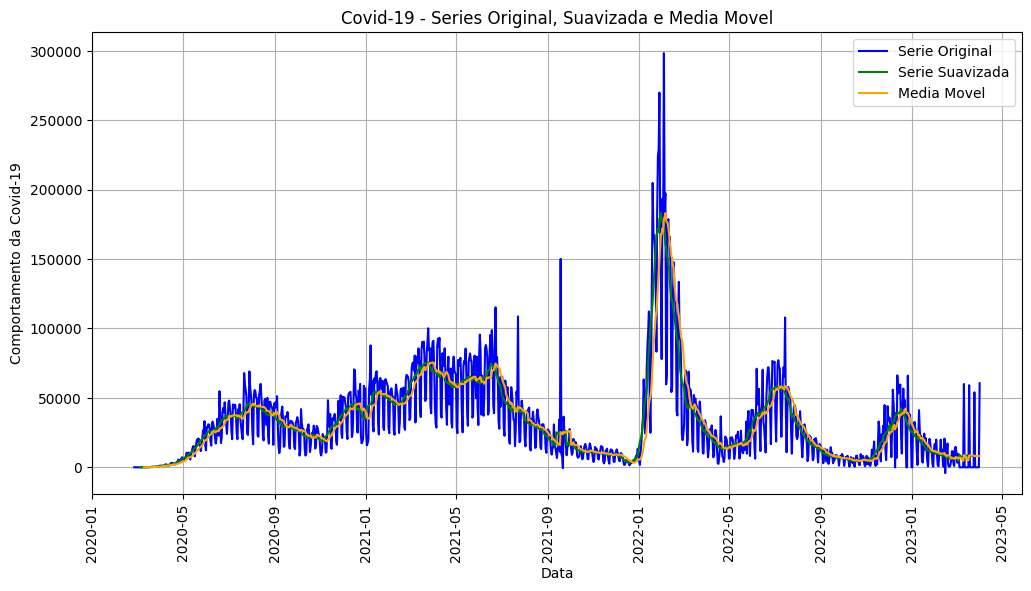

In [39]:
# In[42]: Grafico de serie original, serie suavizada e media movel (Selecionar todos 
# os comandos)
plt.figure(figsize=(12, 6))
plt.plot(covid['Data'], covid['por_dia'], label='Serie Original', 
         color='blue')
plt.plot(covid['Data'], covid['covid_suave'], label='Serie Suavizada', 
         color='green')
plt.plot(covid['Data'], covid['media_movel'], label='Media Movel', 
         color='orange')
plt.title('Covid-19 - Series Original, Suavizada e Media Movel')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Decomposicao da serie temporal em suas componentes(Tendencia, Sazonal e Residuos)

Precisamos da biblioteca statsmodels para realizar a decomposicao da serie temporal nos modelos aditivo e multiplicativo alem de plotar seus componentes 

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Criar a serie temporal
data = pd.date_range(start='2019-01-01', end='2022-12-31', freq='QE')
values = [10, 14, 8, 25, 16, 22, 14, 35, 15, 27, 18, 40, 28, 40, 25, 65]
s = pd.Series(values[:len(data)], index=data)

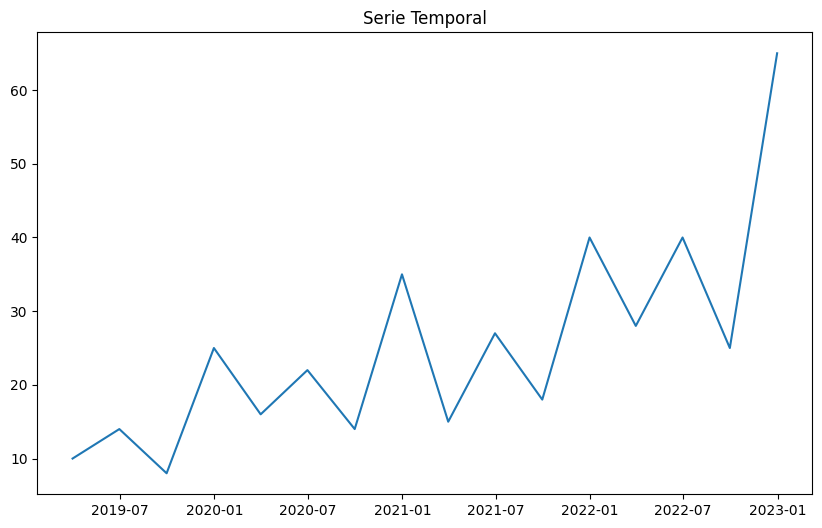

In [41]:
# In[44]: Plotar a serie temporal (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(s)
plt.title('Serie Temporal')
plt.show()

In [42]:
# In[45]: Decomposicao pelo modelo ADITIVO
decompa = seasonal_decompose(s, model='additive', period=4)

# observando os valores da decomposicao pelo modelo aditivo
print(decompa.trend)
print(decompa.seasonal)
print(decompa.resid)

2019-03-31       NaN
2019-06-30       NaN
2019-09-30    15.000
2019-12-31    16.750
2020-03-31    18.500
2020-06-30    20.500
2020-09-30    21.625
2020-12-31    22.125
2021-03-31    23.250
2021-06-30    24.375
2021-09-30    26.625
2021-12-31    29.875
2022-03-31    32.375
2022-06-30    36.375
2022-09-30       NaN
2022-12-31       NaN
Freq: QE-DEC, Name: trend, dtype: float64
2019-03-31    -5.093750
2019-06-30     2.531250
2019-09-30    -7.802083
2019-12-31    10.364583
2020-03-31    -5.093750
2020-06-30     2.531250
2020-09-30    -7.802083
2020-12-31    10.364583
2021-03-31    -5.093750
2021-06-30     2.531250
2021-09-30    -7.802083
2021-12-31    10.364583
2022-03-31    -5.093750
2022-06-30     2.531250
2022-09-30    -7.802083
2022-12-31    10.364583
Freq: QE-DEC, Name: seasonal, dtype: float64
2019-03-31         NaN
2019-06-30         NaN
2019-09-30    0.802083
2019-12-31   -2.114583
2020-03-31    2.593750
2020-06-30   -1.031250
2020-09-30    0.177083
2020-12-31    2.510417
2021-03-3

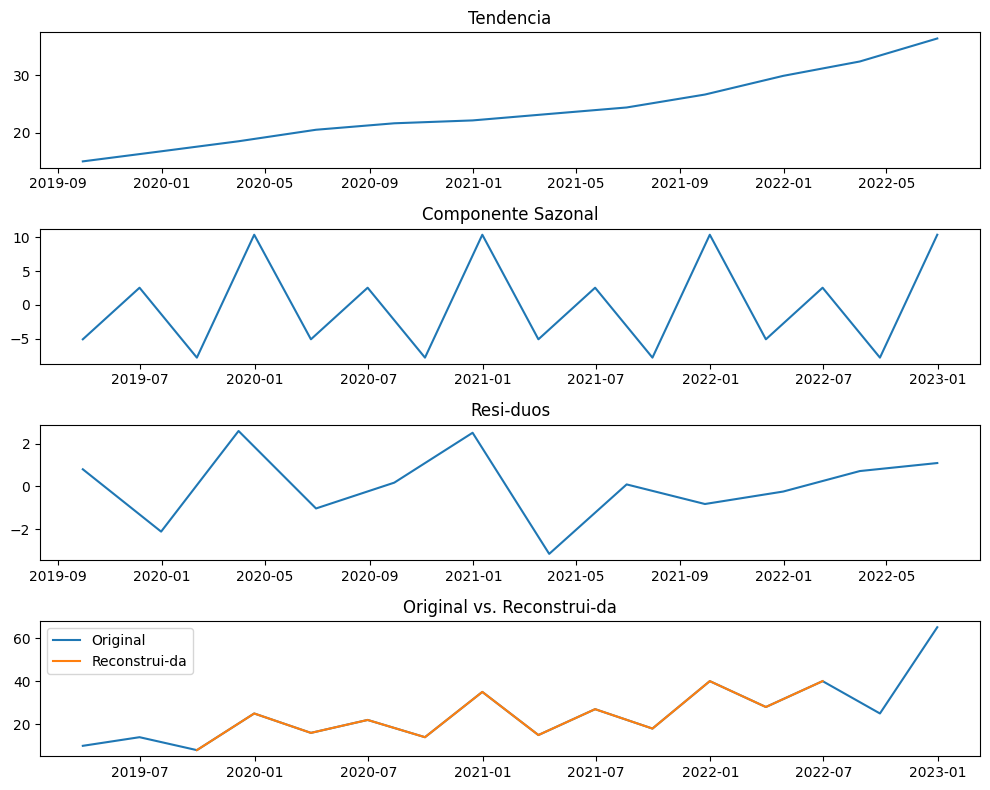

In [43]:
# In[46]: Plotar a decomposicao (Selecionar todos os comandos)
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(decompa.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decompa.seasonal)
plt.title('Componente Sazonal')

plt.subplot(4, 1, 3)
plt.plot(decompa.resid)
plt.title('Resi­duos')

plt.subplot(4, 1, 4)
plt.plot(s, label='Original')
plt.plot(decompa.trend + decompa.seasonal + decompa.resid, label='Reconstrui­da')
plt.title('Original vs. Reconstrui­da')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
# In[47]: Decomposicao pelo modelo MULTIPLICATIVO
decompm = seasonal_decompose(s, model='multiplicative', period=4)

# observando os valores da decomposicao pelo modelo multiplicativo
print(decompm.trend)
print(decompm.seasonal)
print(decompm.resid)

2019-03-31       NaN
2019-06-30       NaN
2019-09-30    15.000
2019-12-31    16.750
2020-03-31    18.500
2020-06-30    20.500
2020-09-30    21.625
2020-12-31    22.125
2021-03-31    23.250
2021-06-30    24.375
2021-09-30    26.625
2021-12-31    29.875
2022-03-31    32.375
2022-06-30    36.375
2022-09-30       NaN
2022-12-31       NaN
Freq: QE-DEC, Name: trend, dtype: float64
2019-03-31    0.796571
2019-06-30    1.100331
2019-09-30    0.622792
2019-12-31    1.480305
2020-03-31    0.796571
2020-06-30    1.100331
2020-09-30    0.622792
2020-12-31    1.480305
2021-03-31    0.796571
2021-06-30    1.100331
2021-09-30    0.622792
2021-12-31    1.480305
2022-03-31    0.796571
2022-06-30    1.100331
2022-09-30    0.622792
2022-12-31    1.480305
Freq: QE-DEC, Name: seasonal, dtype: float64
2019-03-31         NaN
2019-06-30         NaN
2019-09-30    0.856358
2019-12-31    1.008263
2020-03-31    1.085735
2020-06-30    0.975316
2020-09-30    1.039510
2020-12-31    1.068645
2021-03-31    0.809923
20

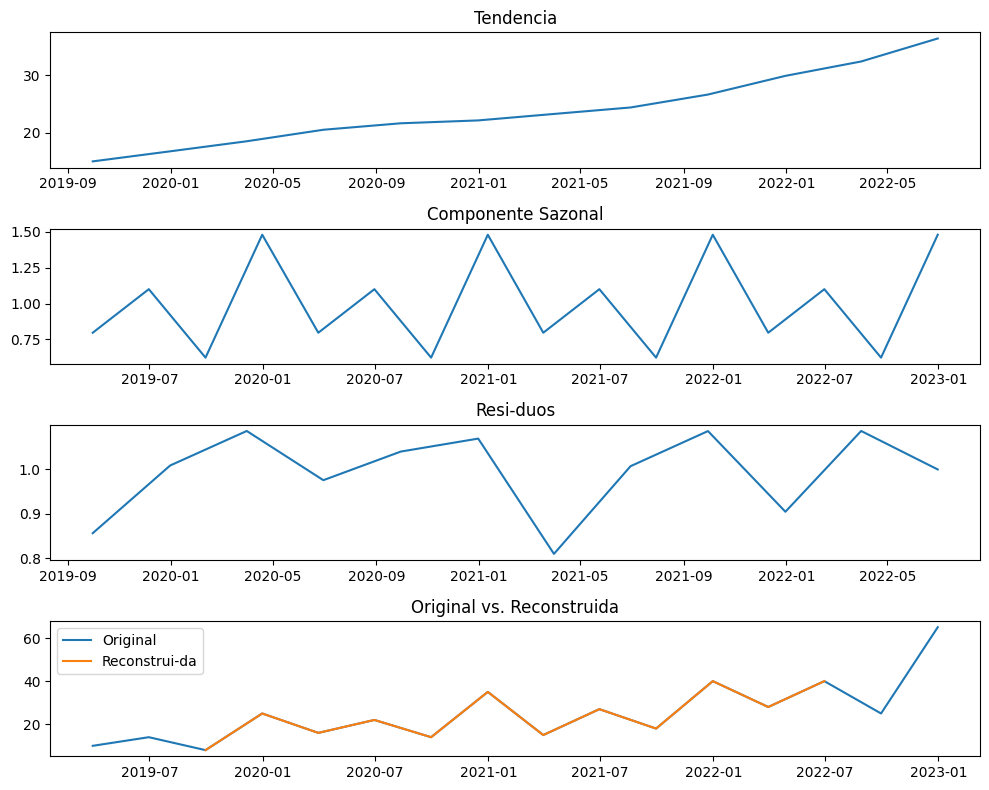

In [45]:
# In[48]: Plotar a decomposicao (Selecionar todos os comandos)
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(decompm.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decompm.seasonal)
plt.title('Componente Sazonal')

plt.subplot(4, 1, 3)
plt.plot(decompm.resid)
plt.title('Resi­duos')

plt.subplot(4, 1, 4)
plt.plot(s, label='Original')
plt.plot(decompm.trend * decompm.seasonal * decompm.resid, label='Reconstrui­da')
plt.title('Original vs. Reconstruida')
plt.legend()

plt.tight_layout()
plt.show()

##### Trabalhando com a serie do PIB do Brasil 

In [46]:
pib = pd.read_excel("data/pib_mensal.xlsx", parse_dates=True, index_col=0)
 
# Transformar a base de dados em um objeto de classe ts
pib_ts = pd.Series(pib['pib'].values, index=pib.index)

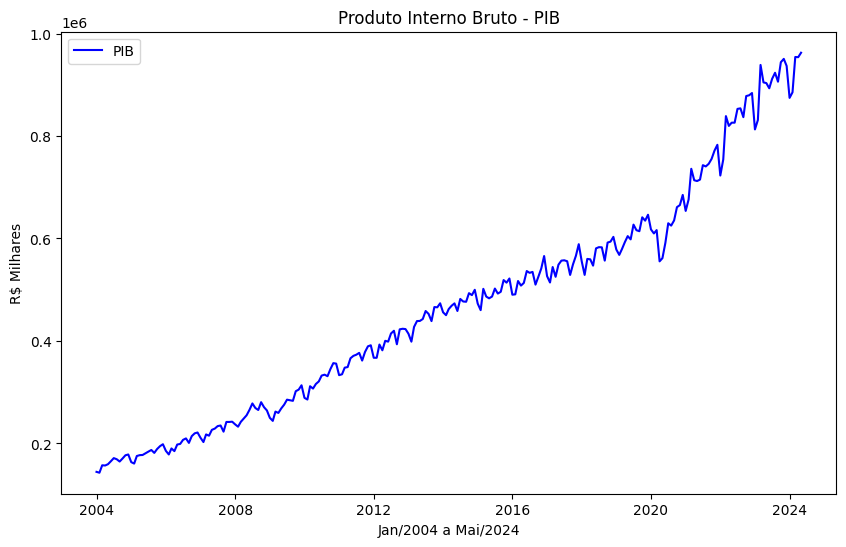

In [47]:

# In[50]: Plotar a serie temporal (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(pib_ts.index, pib_ts.values, label='PIB', color='blue')
plt.title('Produto Interno Bruto - PIB')
plt.xlabel('Jan/2004 a Mai/2024')
plt.ylabel('R$ Milhares')
plt.legend()
plt.show()

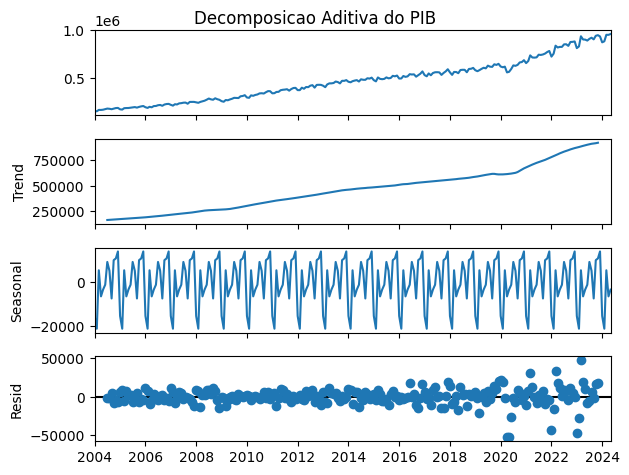

In [48]:
# In[51]: Decompondo o PIB pelo modelo aditivo
decomp_aditivo = seasonal_decompose(pib_ts, model='additive', period=12)

# In[52]: Plotando a decomposicao (Selecionar todos os comandos)
decomp_aditivo.plot()
plt.suptitle('Decomposicao Aditiva do PIB')
plt.show()

In [49]:
# In[53]: Decompondo o PIB pelo modelo multiplicativo
decomp_multiplicativo = seasonal_decompose(pib_ts, model='multiplicative', 
                                           period=12)

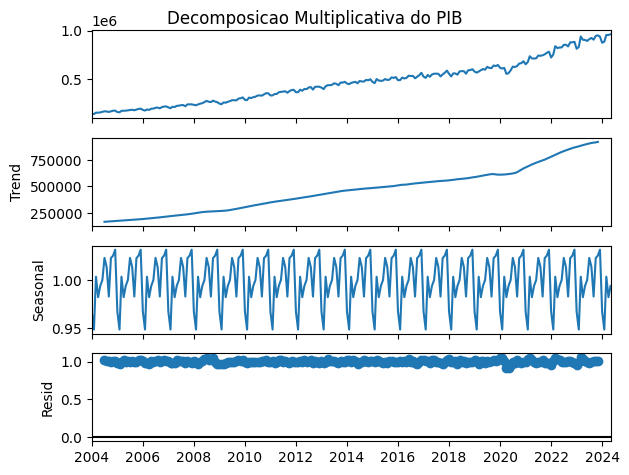

In [50]:
# In[54]: Plotando a decomposicao (Selecionar todos os comandos)
decomp_multiplicativo.plot()
plt.suptitle('Decomposicao Multiplicativa do PIB')
plt.show()

##### Aplicando a decomposicao das series temporais usando a palheta de cores viridis
##### Decomposicao da serie temporal do PIB Mensal BR

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
# Configurar o estilo dos graficos e a paleta de cores
sns.set_theme(style='whitegrid', palette='viridis')

# Carregar os dados do Excel
pib = pd.read_excel('data/pib_mensal.xlsx')

# Transformar a base de dados em um objeto de serie temporal (Selecione todos
# os comandos)
pib_ts = pd.Series(pib.iloc[:, 1].values, 
                   index=pd.date_range(start='2004-01-01',
                                       periods=len(pib), freq='ME'))

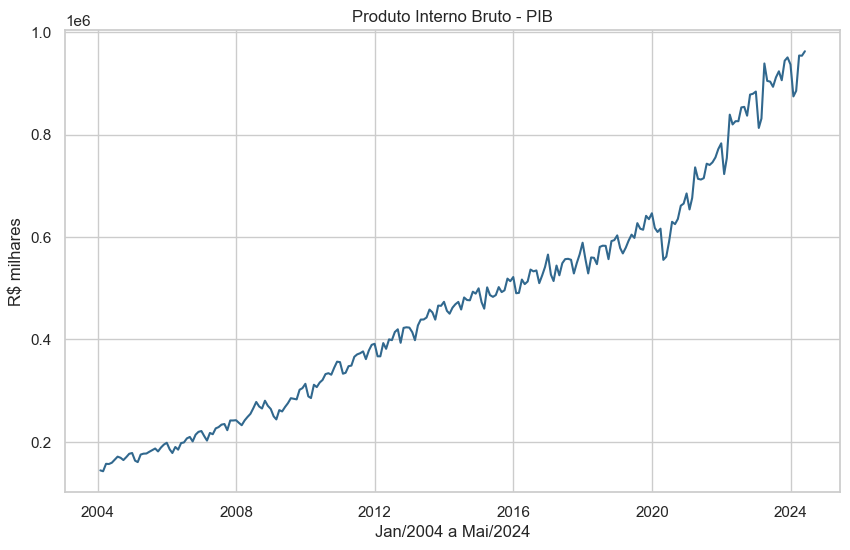

In [55]:
# In[56]: Fazer a plotagem da serie temporal (Selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(pib_ts, color=sns.color_palette("viridis", 2)[0])
plt.title('Produto Interno Bruto - PIB')
plt.xlabel('Jan/2004 a Mai/2024')
plt.ylabel('R$ milhares')
plt.show()

In [56]:
# In[57]: Decompor o PIB pelo modelo aditivo
decomp_add = seasonal_decompose(pib_ts, model='additive', period=12)

# Decompor o PIB pelo modelo multiplicativo
decomp_mul = seasonal_decompose(pib_ts, model='multiplicative', period=12)

In [57]:
# In[58]: Funcao para plotar decomposicao (Selecionar todos os comandos)
def plot_decomposition(decomposition, title):
    colors = sns.color_palette("viridis", 4)
    
    plt.figure(figsize=(14, 10))
    plt.suptitle(title, fontsize=16)

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observado', color=colors[0])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendencia', color=colors[1])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Sazonalidade', color=colors[2])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(414)
    plt.plot(decomposition.resid, label='ResÃiduos', color=colors[3])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

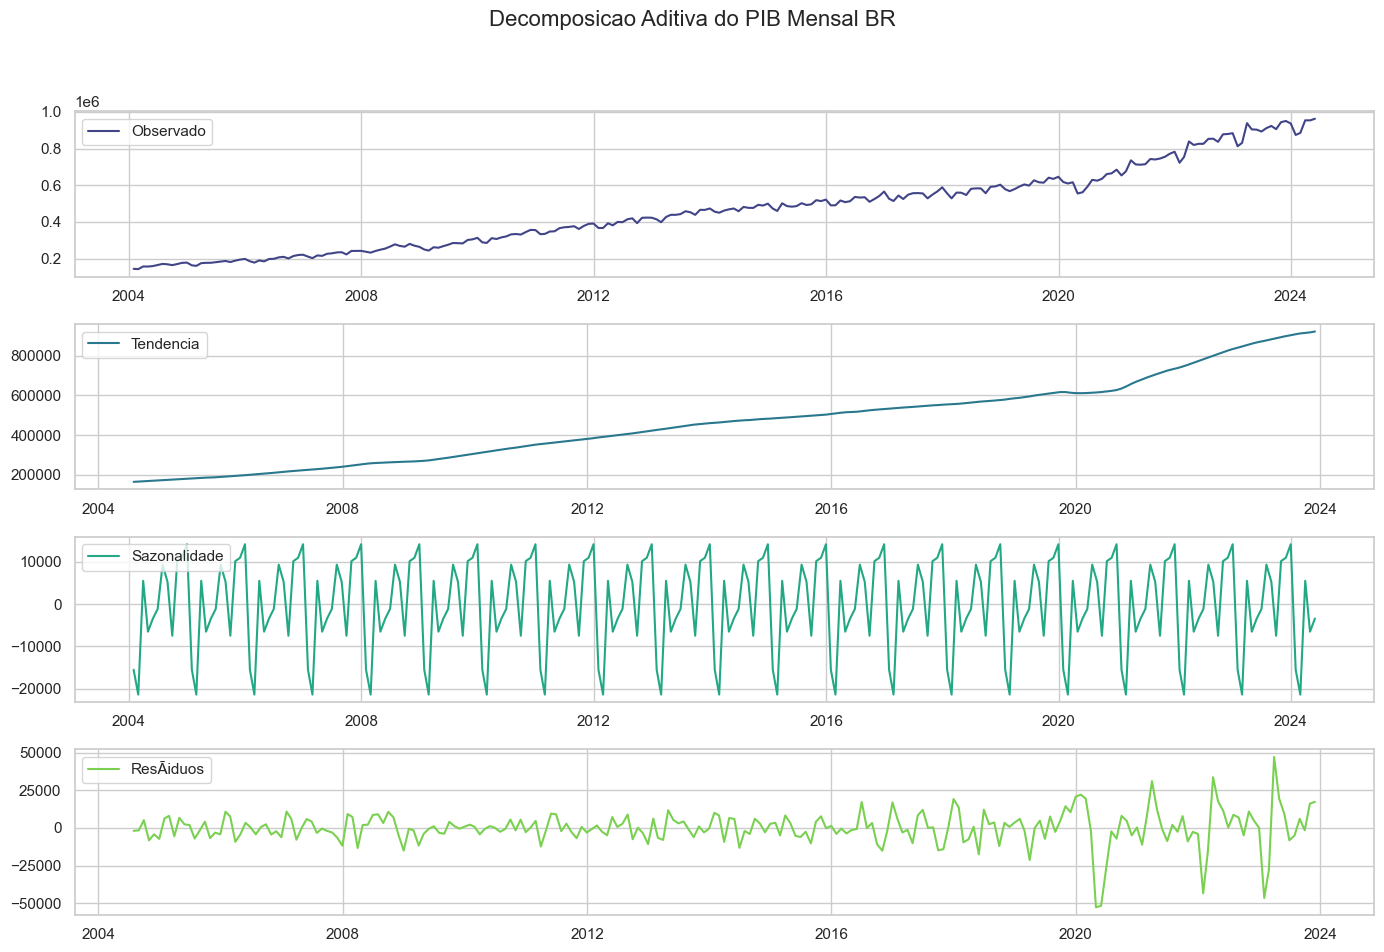

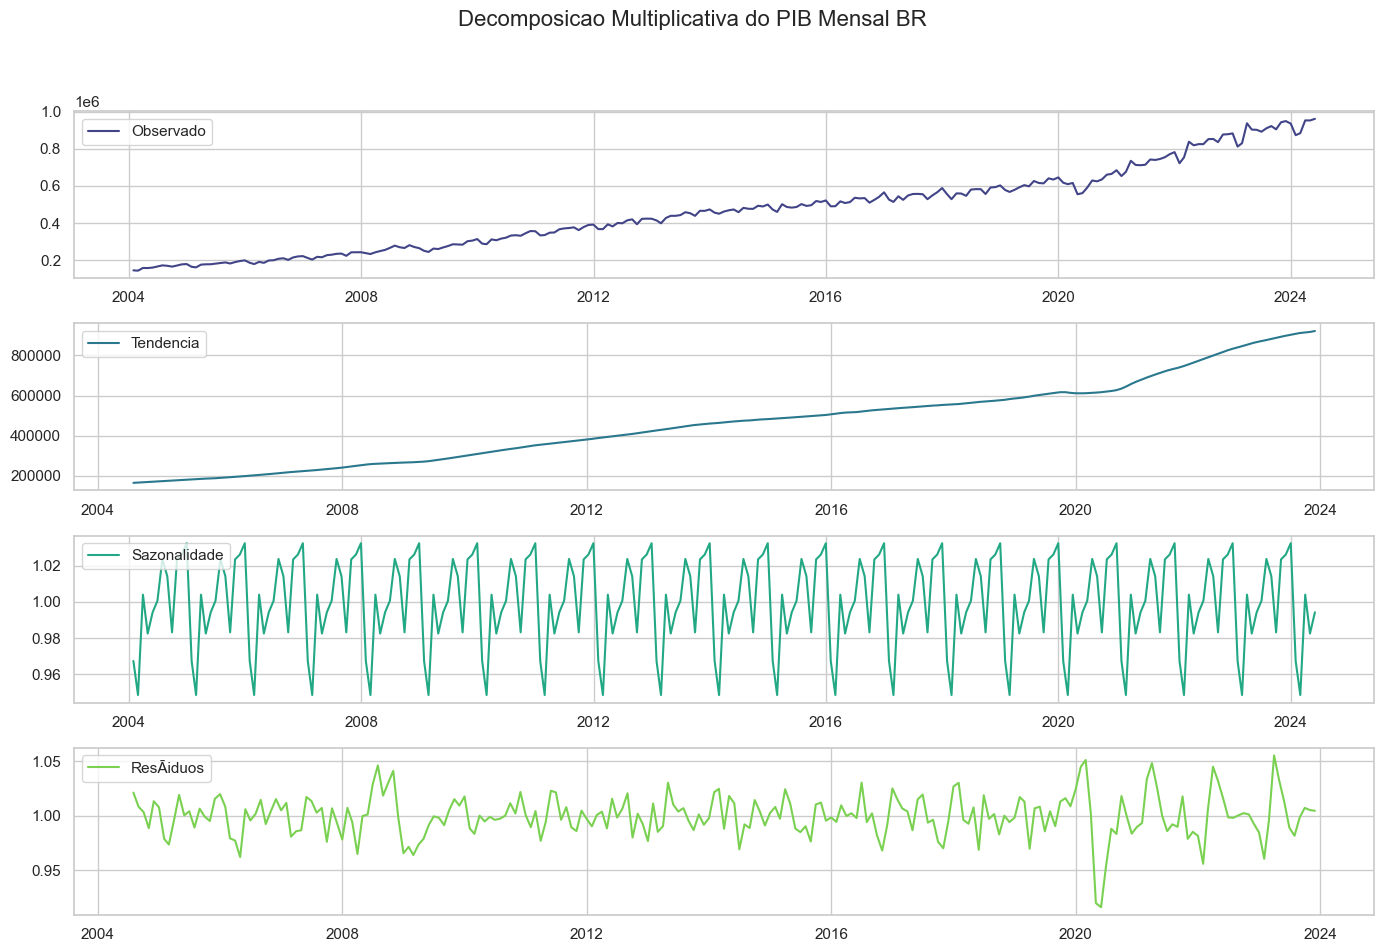

In [58]:
# In[59]: Plotar decomposicao aditiva
plot_decomposition(decomp_add, 'Decomposicao Aditiva do PIB Mensal BR')

# Plotar decomposicao multiplicativa
plot_decomposition(decomp_mul, 'Decomposicao Multiplicativa do PIB Mensal BR')

##### Estatisticas de Acuracia das previsoes

In [62]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score

In [64]:
# Exemplo
reais = np.array([1, 2, 3, 5, 6, 8, 9])
previstos = np.array([1, 3, 3, 4, 6, 7, 9])

# Calculo do Erro
erro = reais - previstos

# Calculo do Erro Medio
merror = sum(erro)/len(erro)
merror

# Calculo do Erro Absoluto Medio
mae = mean_absolute_error(reais, previstos)
mae

# Calculo da Raiz Quadrada do Erro Medio
rmse = root_mean_squared_error(reais, previstos)
rmse

# Calculo do Erro Percentual Medio
erro_percentual = (reais - previstos)/reais
mpe = me = sum(erro_percentual)/len(erro)*100
mpe

# Calculo do Erro Absoluto Percentual Medio
mape = mean_absolute_percentage_error(reais,previstos)*100
mape

np.float64(11.785714285714285)

In [65]:
# In[61]: Calculo do Coeficiente U de Theil
# Funcao para calculo do Coeficiente U de Theil (selecionar todos os comandos)

def division(measure, previousI):
  return measure / previousI

def power(measure):
  return np.power(measure, 2)

def summation(measure):
  return np.sum(measure)

def mean(N, measure):
  return (1/N) * measure

def sqrt(measure):
  return np.sqrt(measure)

def computeTheilU2(y_true, y_pred):
    N = len(y_true)
    
    subtractionNumerator = y_pred[1:] - y_true[1:]
    divisionNumerator = division(subtractionNumerator, y_true[:-1])
    powerNumerator = power(divisionNumerator)
    summationNumerator = summation(powerNumerator)
    meanNumerator = mean(N, summationNumerator)
    numerator = sqrt(meanNumerator)
    
    subtractionDenominator = y_true[1:] - y_true[:-1]
    powerDenominator = power(division(subtractionDenominator, y_true[:-1]))
    denominator = sqrt(mean(N, summation(powerDenominator)))
        
    theilU2 = numerator / denominator
    
    return theilU2

theil = computeTheilU2(reais,previstos)

theil

np.float64(0.7822515361226225)

In [66]:
# In[62]: Exibir as metricas de acuracia (Selecione todos os comandos)
print(" Indicadores de Acuracia")
print(f'ME - Mean Error: {merror:.2f}')
print(f'MAE - Mean Absolute Error: {mae:.2f}')
print(f'RMSE - Raiz Quadrada do Erro Medio: {rmse:.2f}')
print(f'MPE - Mean Percentage Error: {mpe:.2f}')
print(f'MAPE - Mean Absolute Percentage Error: {mape:.2f}')
print(f'THEIL_U - Theils Inequality Coefficient: {theil:.4f}')

 Indicadores de Acuracia
ME - Mean Error: 0.14
MAE - Mean Absolute Error: 0.43
RMSE - Raiz Quadrada do Erro Medio: 0.65
MPE - Mean Percentage Error: -2.50
MAPE - Mean Absolute Percentage Error: 11.79
THEIL_U - Theils Inequality Coefficient: 0.7823
